In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [5]:
track_data = pd.read_csv("tracks_features.csv")


In [6]:
track_data

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [7]:
#drop columns we don't need
refined_track_data_columns = track_data[["name", "album", "artists", "danceability", 
                                         "speechiness", "acousticness", "instrumentalness", 
                                         "liveness", "valence","energy", "tempo", "duration_ms", "year"]]
refined_track_data_columns.head()

,name,album,artists,danceability,speechiness,acousticness,instrumentalness,liveness,valence,energy,tempo,duration_ms,year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [8]:
renamed_track_data_columns= refined_track_data_columns.rename(columns={"name":"Song Title", "album":"Album Title",
                                          "artists":"Artists", "danceability":"Danceability", "acousticness":"Acousticness",
                                          "speechiness":"Speechiness", "instrumentalness":"Instrumentalness",
                                          "liveness":"Liveness", "valence":"Valence", "energy":"Energy", "tempo":"Tempo", "duration_ms":"Duration(ms)",
                                          "year":"Release Year"})
renamed_track_data_columns.head()

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],0.470,0.0727,0.02610,0.000011,0.3560,0.503,0.978,117.906,210133,1999
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],0.599,0.1880,0.01290,0.000071,0.1550,0.489,0.957,103.680,206200,1999
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],0.315,0.4830,0.02340,0.000002,0.1220,0.370,0.970,149.749,298893,1999
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],0.440,0.2370,0.16300,0.000004,0.1210,0.574,0.967,96.752,213640,1999
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],0.426,0.0701,0.00162,0.105000,0.0789,0.539,0.929,127.059,205600,1999


In [9]:
sampled_data = renamed_track_data_columns.sample(frac=.01)

In [10]:
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
130270,Try,Capsule,['Dan Kibler'],0.291,0.0408,0.05550,0.009350,0.3790,0.5290,0.76500,184.805,197147,1998
983710,Miles Away,Rhino Hi-Five: Winger,['Winger'],0.369,0.0325,0.01830,0.000002,0.3520,0.2980,0.60800,182.154,255333,2005
1053396,She's An Animal,Sorry to Disappoint Ya,['Will The Thrill'],0.577,0.0531,0.00687,0.000000,0.4490,0.4550,0.97300,130.009,234693,2014
1121252,Peace After the Storm,"Cold Weather Beats, Vol. 2",['BiG HueB'],0.704,0.1360,0.01510,0.870000,0.0831,0.5720,0.36400,160.036,270106,2019
949339,"Walk, Don't Run",Lineage,"['Dave Liebman', 'Matt Vashlishan', 'Vic Juris...",0.472,0.0934,0.39700,0.015800,0.0824,0.3000,0.57300,113.986,280493,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062564,Missing Page,Million to One,['Steve Million'],0.388,0.0333,0.97400,0.936000,0.1910,0.2280,0.18000,108.356,343307,1995
697914,Bitter,Within,['Wiser Time'],0.522,0.0250,0.32100,0.024800,0.1310,0.0734,0.54200,80.127,256105,2017
916677,I'm Sorry,Mary Arden Collins,['Mary Arden Collins'],0.312,0.0316,0.83500,0.000002,0.3170,0.4660,0.24600,207.964,258000,1997
479861,"Mikrokosmos, BB 105, Vol. 1: No. 36, Free Canon","Bartok: Piano Music, Vol. 5: Mikrokosmos (Comp...","['Béla Bartók', 'Jenő Jandó']",0.405,0.0705,0.99500,0.968000,0.0558,0.7150,0.00263,116.185,52027,2006


In [11]:
sampled_data["Energy"].max()

1.0

In [12]:
sampled_data["Energy"].min()

0.0

In [13]:
energy_bins = [0, .2, .4, .6, .8, 1]
energy_groupings = ["Energy <=.2", "Energy .2-.4", "Energy .4-.6", "Energy .6-.8", "Energy .8-1"]
sampled_data["Energy"] = pd.cut(sampled_data["Energy"], energy_bins, labels=energy_groupings,
                                     include_lowest=True)
sampled_data

,Song Title,Album Title,Artists,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Energy,Tempo,Duration(ms),Release Year
130270,Try,Capsule,['Dan Kibler'],0.291,0.0408,0.05550,0.009350,0.3790,0.5290,Energy .6-.8,184.805,197147,1998
983710,Miles Away,Rhino Hi-Five: Winger,['Winger'],0.369,0.0325,0.01830,0.000002,0.3520,0.2980,Energy .6-.8,182.154,255333,2005
1053396,She's An Animal,Sorry to Disappoint Ya,['Will The Thrill'],0.577,0.0531,0.00687,0.000000,0.4490,0.4550,Energy .8-1,130.009,234693,2014
1121252,Peace After the Storm,"Cold Weather Beats, Vol. 2",['BiG HueB'],0.704,0.1360,0.01510,0.870000,0.0831,0.5720,Energy .2-.4,160.036,270106,2019
949339,"Walk, Don't Run",Lineage,"['Dave Liebman', 'Matt Vashlishan', 'Vic Juris...",0.472,0.0934,0.39700,0.015800,0.0824,0.3000,Energy .4-.6,113.986,280493,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062564,Missing Page,Million to One,['Steve Million'],0.388,0.0333,0.97400,0.936000,0.1910,0.2280,Energy <=.2,108.356,343307,1995
697914,Bitter,Within,['Wiser Time'],0.522,0.0250,0.32100,0.024800,0.1310,0.0734,Energy .4-.6,80.127,256105,2017
916677,I'm Sorry,Mary Arden Collins,['Mary Arden Collins'],0.312,0.0316,0.83500,0.000002,0.3170,0.4660,Energy .2-.4,207.964,258000,1997
479861,"Mikrokosmos, BB 105, Vol. 1: No. 36, Free Canon","Bartok: Piano Music, Vol. 5: Mikrokosmos (Comp...","['Béla Bartók', 'Jenő Jandó']",0.405,0.0705,0.99500,0.968000,0.0558,0.7150,Energy <=.2,116.185,52027,2006


In [14]:
#getting count of each category and converting to percentage for pie chart
energy_lessthan_point2 = ((sampled_data.loc[sampled_data["Energy"]=='Energy <=.2'].count())/12040)*100
energy_lessthan_point2

Song Title          20.282392
Album Title         20.282392
Artists             20.282392
Danceability        20.282392
Speechiness         20.282392
Acousticness        20.282392
Instrumentalness    20.282392
Liveness            20.282392
Valence             20.282392
Energy              20.282392
Tempo               20.282392
Duration(ms)        20.282392
Release Year        20.282392
dtype: float64

In [15]:
energy_point2topoint4 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .2-.4'].count())/12040)*100
energy_point2topoint4

Song Title          17.82392
Album Title         17.82392
Artists             17.82392
Danceability        17.82392
Speechiness         17.82392
Acousticness        17.82392
Instrumentalness    17.82392
Liveness            17.82392
Valence             17.82392
Energy              17.82392
Tempo               17.82392
Duration(ms)        17.82392
Release Year        17.82392
dtype: float64

In [16]:
energy_point4topoint6 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .4-.6'].count())/12040)*100
energy_point4topoint6

Song Title          19.576412
Album Title         19.576412
Artists             19.576412
Danceability        19.576412
Speechiness         19.576412
Acousticness        19.576412
Instrumentalness    19.576412
Liveness            19.576412
Valence             19.576412
Energy              19.576412
Tempo               19.576412
Duration(ms)        19.576412
Release Year        19.576412
dtype: float64

In [17]:
energy_point6topoint8 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .6-.8'].count())/12040)*100
energy_point6topoint8

Song Title          20.872093
Album Title         20.872093
Artists             20.872093
Danceability        20.872093
Speechiness         20.872093
Acousticness        20.872093
Instrumentalness    20.872093
Liveness            20.872093
Valence             20.872093
Energy              20.872093
Tempo               20.872093
Duration(ms)        20.872093
Release Year        20.872093
dtype: float64

In [18]:
energy_point8to1 = ((sampled_data.loc[sampled_data["Energy"]=='Energy .8-1'].count())/12040)*100
energy_point8to1

Song Title          21.445183
Album Title         21.445183
Artists             21.445183
Danceability        21.445183
Speechiness         21.445183
Acousticness        21.445183
Instrumentalness    21.445183
Liveness            21.445183
Valence             21.445183
Energy              21.445183
Tempo               21.445183
Duration(ms)        21.445183
Release Year        21.445183
dtype: float64

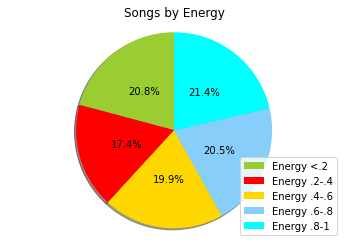

In [19]:
#pie chart
labels = ["Energy <.2", "Energy .2-.4", "Energy .4-.6", "Energy .6-.8", "Energy .8-1"]
sizes = [20.830565, 17.350498, 19.883721, 20.539867, 21.395349]
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 
          'cyan','lightcoral','blue','pink', 'darkgreen', 
          'yellow']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, shadow=True, startangle=90, radius=1.2)
patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%' )
plt.title("Songs by Energy")
plt.legend(patches, labels, loc="lower right")
ax1.axis('equal')
plt.savefig("Images/energy-pie.png")
plt.show()

In [20]:
sampled_data_by_mean_energy = renamed_track_data_columns.groupby(["Artists"]).mean()["Energy"]
sampled_data_by_mean_danceability = renamed_track_data_columns.groupby(["Artists"]).mean()["Danceability"]
sampled_data_by_mean_speechiness = renamed_track_data_columns.groupby(["Artists"]).mean()["Speechiness"]
sampled_data_by_mean_acousticness = renamed_track_data_columns.groupby(["Artists"]).mean()["Acousticness"]
sampled_data_by_mean_instrumentalness = renamed_track_data_columns.groupby(["Artists"]).mean()["Instrumentalness"]
sampled_data_by_mean_liveness = renamed_track_data_columns.groupby(["Artists"]).mean()["Liveness"]
sampled_data_by_mean_valence = renamed_track_data_columns.groupby(["Artists"]).mean()["Valence"]
sampled_data_by_mean_tempo = renamed_track_data_columns.groupby(["Artists"]).mean()["Tempo"]

In [21]:
summary_by_artist = pd.DataFrame({"Mean Energy": sampled_data_by_mean_energy,
                                 "Mean Danceability": sampled_data_by_mean_danceability,
                                 "Mean Speechiness": sampled_data_by_mean_speechiness,
                                 "Mean Acousticness": sampled_data_by_mean_acousticness,
                                 "Mean Insturmentalness": sampled_data_by_mean_instrumentalness,
                                 "Mean Liveness": sampled_data_by_mean_liveness,
                                 "Mean Valence": sampled_data_by_mean_valence,
                                 "Mean Tempo": sampled_data_by_mean_tempo})
summary_by_artist.head()

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo
Artists,,,,,,,,
"[""'63 Burnout""]",0.869500,0.277857,0.068479,0.091950,0.809429,0.244679,0.580643,150.376714
"[""'68""]",0.799786,0.379143,0.101486,0.066451,0.215516,0.254450,0.331764,124.522643
"[""'89 Skratch Gangstaz (DJ Pone & Snayk Eyez)""]",0.902000,0.632000,0.452000,0.230000,0.000353,0.709000,0.577000,92.729000
"[""'Ale'a"", 'Ryan Gonzalez']",0.544000,0.378000,0.065300,0.263000,0.907000,0.116000,0.312000,156.956000
"[""'Boodle It' Wiggins""]",0.320000,0.590000,0.032700,0.992000,0.005040,0.111000,0.440000,95.263000


In [22]:
top_ten_energy = summary_by_artist.sort_values(["Mean Energy"], ascending=False)
top_ten_energy.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo
Artists,,,,,,,,
['The Trio of Stridence'],1.0,0.458,0.4640,0.314000,0.8700,0.3230,0.02840,112.827
"['Morbid Angel', 'DJ Ruffneck']",1.0,0.388,0.1690,0.037800,0.0000,0.3730,0.05840,180.022
"['Dog Blood', 'Bambounou']",1.0,0.800,0.0416,0.000008,0.8640,0.0961,0.03500,127.009
['Andraculoid'],1.0,0.455,0.0969,0.035500,0.8510,0.0703,0.05220,148.012
['Mahavishnu Project'],1.0,0.248,0.4420,0.102000,0.0418,0.3940,0.03100,82.188
"['Magúla', 'Lovelace Camilo']",1.0,0.223,0.2270,0.001780,0.0289,0.2570,0.03620,119.945
['Audience'],1.0,0.228,0.0453,0.856000,0.7490,0.9590,0.00001,96.637
['DJ Auzern'],1.0,0.481,0.0633,0.000049,0.4470,0.0836,0.55200,143.982
['Don Mock'],1.0,0.642,0.5620,0.724000,0.6200,0.1060,0.03470,141.167


In [23]:
top_ten_danceability = summary_by_artist.sort_values(["Mean Danceability"], ascending=False)
top_ten_danceability.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo
Artists,,,,,,,,
['Andrea HEinstein'],0.567,0.992,0.4060,0.07500,0.879000,0.1110,0.573,126.016
"['Petey Pablo', 'Juelz B']",0.829,0.987,0.1560,0.04790,0.000000,0.0662,0.884,120.974
['Gen'],0.547,0.987,0.0994,0.00161,0.017300,0.2000,0.960,111.995
['Audio Soul Project'],0.734,0.986,0.2280,0.05130,0.334000,0.1770,0.756,123.242
"['Father', 'Ethereal']",0.486,0.984,0.0770,0.00369,0.000272,0.0958,0.308,120.006
"['Super Flu', 'Andhim']",0.437,0.984,0.4810,0.06220,0.778000,0.0682,0.508,120.007
['Baiyon'],0.515,0.984,0.1660,0.02730,0.063400,0.0821,0.741,123.004
"['LILDRUGHILL', 'ROCKET']",0.613,0.984,0.1040,0.75800,0.000079,0.0773,0.625,120.018
"['Fusion Groove Orchestra', 'Steve Lucas', 'Liêm']",0.936,0.983,0.3250,0.09430,0.719000,0.0902,0.878,126.000


In [24]:
top_ten_speechiness = summary_by_artist.sort_values(["Mean Speechiness"], ascending=False)
top_ten_speechiness.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo
Artists,,,,,,,,
['Cratis Williams'],0.325000,0.618000,0.963000,0.769000,0.000000e+00,0.698000,0.416000,73.963000
['Cheech Marin'],0.304000,0.786000,0.963000,0.877000,0.000000e+00,0.788000,0.972000,98.427000
['Mindy Kaling'],0.451000,0.602000,0.962000,0.779000,0.000000e+00,0.950000,0.482000,67.656000
"['Chingo Bling', 'Eddie Deville']",0.382000,0.729000,0.962000,0.874000,0.000000e+00,0.168000,0.757000,70.350000
['Susi Amendola'],0.263857,0.650143,0.960429,0.398286,4.157143e-07,0.097671,0.264857,149.088857
"['Insane Ian', 'Schaffer The Darklord']",0.280000,0.616000,0.960000,0.596000,0.000000e+00,0.557000,0.388000,71.725000
['Michel Rosenberg'],0.334000,0.718000,0.960000,0.948000,0.000000e+00,0.419000,0.618000,76.428000
"['Arild Andersen', 'Götz Bühler', 'Gard Nilssen', 'Helge Lien']",0.237000,0.640000,0.960000,0.772000,0.000000e+00,0.956000,0.666000,65.740000
['Dan Mintz'],0.457000,0.579000,0.960000,0.850000,0.000000e+00,0.751000,0.508000,80.956000


In [25]:
top_ten_acousticness = summary_by_artist.sort_values(["Mean Acousticness"], ascending=False)
top_ten_acousticness.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo
Artists,,,,,,,,
['Golana'],0.046522,0.23500,0.039156,0.996,0.885556,0.094978,0.603556,78.136556
"['Howard Skempton', 'Werner Dickel']",0.050900,0.59300,0.077000,0.996,0.939000,0.143000,0.865000,130.537000
"['Leopold Godowsky', 'Péter Nagy']",0.006360,0.26500,0.039600,0.996,0.878000,0.085100,0.066100,91.692000
['The California Ramblers'],0.245000,0.81900,0.084000,0.996,0.888000,0.241000,0.747000,99.291000
['Aslan-Bek Samtiev'],0.021400,0.25000,0.047000,0.996,0.498000,0.194000,0.423000,68.265000
['Blind Willie & Partner'],0.277000,0.50200,0.084000,0.996,0.000938,0.155000,0.735000,198.640000
['Blind Willie McTell & Partner'],0.244000,0.55600,0.078950,0.996,0.046800,0.124000,0.754500,156.006500
"['Blind Willie McTell', 'Curley Weaver']",0.185000,0.50600,0.031100,0.996,0.001180,0.116000,0.647000,104.788000
"['Samuel Barber', 'See Siang Wong']",0.016300,0.45100,0.081600,0.996,0.968000,0.072900,0.252000,73.579000


In [26]:
top_ten_instrumentalness = summary_by_artist.sort_values(["Mean Insturmentalness"], ascending=False)
top_ten_instrumentalness.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo
Artists,,,,,,,,
"['Manuel Blasco De Nebra', 'Piffaro']",0.044600,0.2430,0.05000,0.991000,0.9990,0.1080,0.3730,114.0650
"['Bvdub', 'Wang Lijing', 'Lu Yan']",0.215000,0.0563,0.04570,0.528000,0.9980,0.2760,0.1230,60.2120
['Broken Light'],0.664000,0.4040,0.03330,0.609000,0.9970,0.5670,0.0469,131.5230
"['Per Nørgård', 'Heinrich Finck', 'Copenhagen Cornetts & Sackbutts', 'Musica Ficta', 'Bo Holten']",0.095300,0.1710,0.03870,0.887000,0.9970,0.2570,0.0715,122.5620
"['John Cage', 'Tobias Rüger', 'Reimar Volker', 'Burkhard Schlothauer', 'Johannes Platz', 'Ulrich Maiss', 'Andreas Peters', 'Ulrich Krieger']",0.019000,0.1620,0.04460,0.654000,0.9960,0.1980,0.0286,88.9080
"['John Cage', 'Reimar Volker', 'Burkhard Schlothauer', 'Johannes Platz', 'Ulrich Maiss', 'Andreas Peters', 'Ulrich Krieger']",0.017495,0.0680,0.02225,0.475001,0.9955,0.0968,0.2640,42.4765
"['Eßbach', 'Hombsch', 'Schmidt', 'Zeumer']",0.020400,0.1960,0.03730,0.989000,0.9950,0.1460,0.1910,92.3780
['Idea Fire Company'],0.318000,0.3910,0.03930,0.918000,0.9940,0.1990,0.0254,110.3230
['Torture(d) Machine'],0.968000,0.0000,0.00000,0.835000,0.9930,0.1680,0.0000,0.0000


In [27]:
top_ten_liveness = summary_by_artist.sort_values(["Mean Liveness"], ascending=False)
top_ten_liveness.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo
Artists,,,,,,,,
"['Ayreon', 'Simone Simons']",0.897,0.481,0.0464,0.016300,0.088800,0.994,0.268,133.456
"['Ayreon', 'Damian Wilson']",0.867,0.469,0.0531,0.021600,0.001350,0.993,0.270,137.010
"[""Youssou N'Dour"", 'Bruce Cockburn']",0.576,0.510,0.0411,0.504000,0.000006,0.992,0.372,141.661
"['Brent Helming', 'Marlisa Yace']",0.804,0.626,0.0376,0.650000,0.000000,0.991,0.616,132.016
['Down'],0.983,0.202,0.1810,0.000069,0.000260,0.991,0.155,97.495
"['Elba Ramalho', 'Lenine']",0.749,0.640,0.0509,0.429000,0.000001,0.991,0.732,107.816
"['Ayreon', 'Thijs van Leer']",0.861,0.503,0.0312,0.084800,0.000005,0.991,0.498,80.912
"['Tommy Emmanuel', 'John Knowles', 'Steve Wariner']",0.708,0.698,0.0773,0.790000,0.408000,0.991,0.838,112.217
"['Sufjan Stevens', 'Gallant']",0.826,0.753,0.0367,0.174000,0.000007,0.990,0.794,135.000


In [40]:
top_ten_valence = summary_by_artist.sort_values(["Mean Valence"], ascending=False)
top_ten_valence.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo
Artists,,,,,,,,
['Gerry Wimsey'],0.109000,0.887,0.25400,0.984000,0.94200,0.039400,1.000000,119.854
['Peter Horan'],0.060100,0.650,0.05920,0.994000,0.90900,0.186000,0.996000,84.239
"['Niall Vallely', 'dezi donnelly', 'mike mcgoldrick']",0.273000,0.511,0.05880,0.978000,0.47300,0.208000,0.994000,61.895
['Fred Whiting'],0.315000,0.740,0.09810,0.988000,0.00791,0.087200,0.994000,112.993
['Bridge Céilí Band'],0.929000,0.527,0.05480,0.782000,0.78200,0.913000,0.993000,123.334
['Tsvyatko Blagoev'],0.264000,0.526,0.10400,0.960000,0.91700,0.160000,0.993000,78.810
['The Hyde Brothers'],0.397000,0.780,0.10400,0.990000,0.95400,0.073500,0.991000,142.977
['Harry Bradley'],0.333267,0.630,0.06364,0.929133,0.89100,0.144953,0.990867,114.462
"['Don Reno', 'Eddie Adcock']",0.796500,0.503,0.03630,0.425500,0.92000,0.326000,0.990500,127.339


In [50]:
top_ten_tempo = summary_by_artist.sort_values(["Mean Tempo"], ascending=False)
top_ten_tempo.head(10)

,Mean Energy,Mean Danceability,Mean Speechiness,Mean Acousticness,Mean Insturmentalness,Mean Liveness,Mean Valence,Mean Tempo
Artists,,,,,,,,
['MICROFUNK'],0.907,0.671,0.2470,0.000466,0.751000,0.0408,0.176,246.130
"['Morley', 'David Amram', 'Hamid Drake & William Parker']",0.113,0.445,0.1250,0.325000,0.000000,0.1120,0.183,240.063
"['Heiko Laux', 'Surgeon', 'Alexander Kowalski', 'Ricardo Villalobos', 'Johannes Heil', 'Alter Ego', 'Diego Hostettler', 'Double X']",0.475,0.697,0.1750,0.000087,0.913000,0.0978,0.184,220.179
"['Dillon Francis', 'Diplo', 'Maluca', 'Alvaro']",0.740,0.730,0.2440,0.000837,0.421000,0.0926,0.143,220.085
['The 4Qua Of Orion'],0.828,0.630,0.3720,0.791000,0.002830,0.0926,0.953,220.051
['Imagination Society'],0.427,0.654,0.3440,0.470000,0.938000,0.0675,0.576,219.943
['Subito'],0.482,0.206,0.0335,0.719000,0.464000,0.1340,0.400,219.828
"['Pitch Black', 'KP', 'PZ']",0.773,0.314,0.0822,0.000535,0.720000,0.3930,0.313,219.802
"['Skylar Stecker', 'Dj Drew', 'Michael Mayeda']",0.965,0.459,0.1710,0.009750,0.000031,0.9250,0.380,217.962
